<a href="https://colab.research.google.com/github/mananuppadhyay/Indian-Movie-Rating-Prediction/blob/main/Questt_Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor

Basic data exploration

In [2]:
df= pd.read_csv('indian movie data.csv', encoding='latin')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df1= df.copy() #copy of dataframe for further analysis

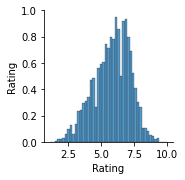

Dealing with the missing values

In [9]:
df1= df1.dropna(subset=['Rating','Name']) 
#dropping all rows with missin rating because it is the variable we are predicting eventually

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB


In [ ]:
#For duration we shall replace it with the mean value of duration of movies
df1['Duration']=df1['Duration'].str.replace("min","")
df1['Duration']=df1['Duration'].fillna(0)
df1['Duration']=df1['Duration'].astype(int)

In [47]:
u= df1['Duration'].mean()
df1['Duration']=df1['Duration'].replace(0,u)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  7919 non-null   float64
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(2), object(8)
memory usage: 680.5+ KB


In [14]:
#Genre has a 100 missing values so categorising them as Other Genres
df1['Genre']=df1['Genre'].fillna('Other Genres')

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  7919 non-null   float64
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(2), object(8)
memory usage: 680.5+ KB


So we have dealt with the missing values in most columns except actors and directors

Dealing with Actors and Directors and Encoding them

In [16]:
df1= df1.dropna(subset=['Actor 1','Actor 2', 'Actor 3','Director'])

In [17]:
df1.reset_index(drop='true')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7627 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7627 non-null   object 
 1   Year      7627 non-null   object 
 2   Duration  7627 non-null   float64
 3   Genre     7627 non-null   object 
 4   Rating    7627 non-null   float64
 5   Votes     7627 non-null   object 
 6   Director  7627 non-null   object 
 7   Actor 1   7627 non-null   object 
 8   Actor 2   7627 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(2), object(8)
memory usage: 655.4+ KB


Encoding actors based on the number of appearances in the dataframe (sort of like popularity)

In [18]:
actors = []
cols = ['Actor 1', 'Actor 2', 'Actor 3']
for col in cols:
    actors.append(df1[col].unique())
actors = np.unique([item for sublist in actors for item in sublist])
actors

array(['A. Muthu', 'A. Nairang', 'A.H. Shore', ..., 'Zubeida',
       'Zuber K. Khan', 'Zulfi Sayed'], dtype='<U31')

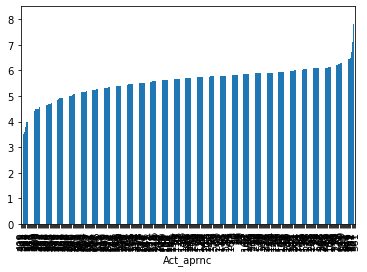

In [19]:
df1['Act_aprnc'] = 0
for actor in actors:
    dummy = df1[['Actor 1', 'Actor 2', 'Actor 3']] == actor
    index = dummy[dummy.apply(lambda x: any(x), axis=1)].index.values
    index = df1.loc[index].sort_values('Year').index.values
    aprnc = range(len(index))
    df1.loc[index, 'Act_aprnc'] = df1.loc[index, 'Act_aprnc'] + aprnc

df1.drop(['Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)
df1[['Rating', 'Act_aprnc']].groupby('Act_aprnc').mean().sort_values(by='Rating').plot.bar(legend=False);

Rating                                              
             count      mean       std  min  25%  50%  75%   max
Aprnc_bins                                                      
Unknown     2408.0  5.935963  1.493112  1.7  4.9  6.2  7.0  10.0
Mid         3282.0  5.829220  1.333239  1.4  4.9  6.0  6.8   9.3
Good        1655.0  5.705076  1.243775  1.1  4.9  5.8  6.6   8.8
Top          282.0  5.278014  1.152444  2.3  4.6  5.4  6.0   8.1

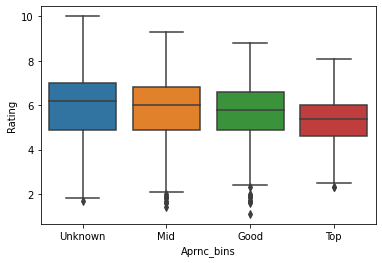

In [20]:
df1['Aprnc_bins'] = pd.cut(df1.Act_aprnc, 
                           [0,10,75,200,df1.Act_aprnc.max()+1],
                          labels=['Unknown', 'Mid', 'Good', 'Top'],
                          include_lowest=True)

sns.boxplot(data=df1, x='Aprnc_bins', y='Rating')
df1[['Rating', 'Aprnc_bins']].groupby('Aprnc_bins').describe()

In [21]:
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Act_aprnc,Aprnc_bins
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,Gaurav Bakshi,4,Unknown
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,5,Unknown
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,75,Mid
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,8,Unknown
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,2,Unknown


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7627 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        7627 non-null   object  
 1   Year        7627 non-null   object  
 2   Duration    7627 non-null   float64 
 3   Genre       7627 non-null   object  
 4   Rating      7627 non-null   float64 
 5   Votes       7627 non-null   object  
 6   Director    7627 non-null   object  
 7   Act_aprnc   7627 non-null   int64   
 8   Aprnc_bins  7627 non-null   category
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 802.0+ KB


In [23]:
cast_class_mapping = {'Unknown': 0, 'Mid': 1, 'Good': 2, 'Top': 3}
cast_class_mapping = {'Unknown': 0, 'Mid': 1, 'Good': 2, 'Top': 3}
df1['Cast_class'] = df1.Aprnc_bins.map(cast_class_mapping)
df1.drop(['Act_aprnc', 'Aprnc_bins'], axis=1, inplace=True)


In [24]:
df1['Cast_class'].astype(int)
df1.reset_index(drop='true')

,Name,Year,Duration,Genre,Rating,Votes,Director,Cast_class
0,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.0,8,Gaurav Bakshi,0
1,#Yaaram,(2019),110.000000,"Comedy, Romance",4.4,35,Ovais Khan,0
2,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,1
3,...Yahaan,(2005),142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,0
4,?: A Question Mark,(2012),82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,0
...,...,...,...,...,...,...,...,...
7622,Zulm Ki Hukumat,(1992),97.746559,"Action, Crime, Drama",5.3,135,Bharat Rangachary,3
7623,Zulm Ki Zanjeer,(1989),125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,1
7624,Zulm Ko Jala Doonga,(1988),97.746559,Action,4.6,11,Mahendra Shah,1
7625,Zulmi,(1999),129.000000,"Action, Drama",4.5,655,Kuku Kohli,2


In [25]:
df1['Dir_aprnc'] = 0
for director in df1.Director.unique():
    index = df1[df1.Director == director].sort_values('Year').index.values
    aprnc = range(len(index))
    df1.loc[index, 'Dir_aprnc'] = aprnc

Rating                                                 
              count      mean       std  min   25%  50%    75%   max
Aprnc_bins                                                          
No-name      4059.0  5.847672  1.406463  1.6  4.90  6.0  6.900  10.0
Experienced  3321.0  5.810900  1.313533  1.4  4.90  6.0  6.800   9.1
Blossom       240.0  5.386250  1.333170  1.6  4.40  5.4  6.325   8.6
Brand           7.0  4.171429  1.807129  1.1  3.25  4.4  5.400   6.4

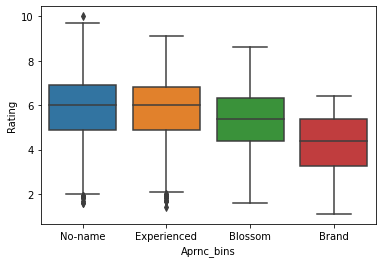

In [26]:
df1['Aprnc_bins'] = pd.cut(df1.Dir_aprnc, 
                          [0,1,20,40,df1.Dir_aprnc.max()+1],
                          labels=['No-name', 'Experienced', 'Blossom', 'Brand'],
                          include_lowest=True)

sns.boxplot(data=df1, x='Aprnc_bins', y='Rating')
df1[['Rating', 'Aprnc_bins']].groupby('Aprnc_bins').describe()

In [27]:
dir_class_mapping = {'No-name': 0, 'Experienced': 1, 'Blossom': 2, 'Brand': 3}
df1['Dir_class'] = df1.Aprnc_bins.map(dir_class_mapping).astype(int)
df1.drop(['Director', 'Dir_aprnc', 'Aprnc_bins'], axis=1, inplace=True)
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Cast_class,Dir_class
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,0,0
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,0,0
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827,1,1
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,1086,0,0
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,0,0


Dealing with Genres

In [28]:
genre= pd.get_dummies(df1.Genre.str.split(',').apply(pd.Series).stack()).sum(level=0)
genre=genre.fillna(0)
genre.head()

<ipython-input-28-d9c365b74f40>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genre= pd.get_dummies(df1.Genre.str.split(',').apply(pd.Series).stack()).sum(level=0)


,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,...,Horror,Music,Musical,Mystery,Other Genres,Romance,Sci-Fi,Sport,Thriller,War
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
df1.reset_index(drop='true')
genre.reset_index(drop='true')
df1 = pd.concat([df1, genre], axis=1)
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Cast_class,Dir_class,Action,Adventure,...,Horror,Music,Musical,Mystery,Other Genres,Romance,Sci-Fi,Sport,Thriller,War
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,(1997),147.0,"Comedy, Drama, Musical",4.7,827,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,...Yahaan,(2005),142.0,"Drama, Romance, War",7.4,1086,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,?: A Question Mark,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
df1.reset_index(drop='true')
df1=df1.drop(['Name','Genre'],axis=1)
df1.head()

,Year,Duration,Rating,Votes,Cast_class,Dir_class,Action,Adventure,Biography,Comedy,...,Horror,Music,Musical,Mystery,Other Genres,Romance,Sci-Fi,Sport,Thriller,War
1,(2019),109.0,7.0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,(2019),110.0,4.4,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,(1997),147.0,4.7,827,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,(2005),142.0,7.4,1086,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,(2012),82.0,5.6,326,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
df1['Year']=df1['Year'].str.replace('(', "")
df1['Year']=df1['Year'].str.replace(')', "")
df1['Year']=df1['Year'].astype(int)

<ipython-input-31-4b3691eb322a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Year']=df1['Year'].str.replace('(', "")
<ipython-input-31-4b3691eb322a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Year']=df1['Year'].str.replace(')', "")


Feature Scaling

In [32]:
df1['Year']=2020-df1['Year']  # Scaling it to how many years ago (from 2020)

In [33]:
df1.head()

,Year,Duration,Rating,Votes,Cast_class,Dir_class,Action,Adventure,Biography,Comedy,...,Horror,Music,Musical,Mystery,Other Genres,Romance,Sci-Fi,Sport,Thriller,War
1,1,109.0,7.0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,110.0,4.4,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,23,147.0,4.7,827,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,142.0,7.4,1086,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,82.0,5.6,326,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
df1['Votes']=df1['Votes'].replace(',','')
df1['Votes']=df1['Votes'].astype(int)

In [35]:
minmax= MinMaxScaler()
df1['Duration']=minmax.fit_transform(df1[['Duration']])
df1['Votes']=minmax.fit_transform(df1[['Votes']])

In [36]:
df1['Cast_class']=df1['Cast_class'].astype(int)

In [37]:
df1.corr()

,Year,Duration,Rating,Votes,Cast_class,Dir_class,Action,Adventure,Biography,Comedy,...,Horror,Music,Musical,Mystery,Other Genres,Romance,Sci-Fi,Sport,Thriller,War
Year,1.000000,0.080706,0.196905,-0.134255,0.093638,0.145414,0.003969,0.037283,-0.050823,-0.033883,...,-0.079401,-0.009768,0.090093,0.006909,0.177101,0.039795,-0.015266,-0.020642,-0.081675,-0.017805
Duration,0.080706,1.000000,0.064063,0.135249,0.228863,0.180509,0.000014,0.037802,-0.003488,0.107562,...,-0.083956,-0.022806,0.041362,-0.009859,-0.027547,-0.043262,-0.020858,0.001569,-0.054682,0.006851
Rating,0.196905,0.064063,1.000000,0.133519,-0.090206,-0.043528,-0.011090,-0.022438,0.048089,-0.052036,...,-0.132651,0.024024,0.017970,-0.002400,0.034245,-0.038335,0.012067,-0.000185,-0.051568,-0.021498
Votes,-0.134255,0.135249,0.133519,1.000000,0.038235,0.015482,-0.011935,0.009764,0.048253,0.054492,...,-0.020056,-0.003832,-0.015258,-0.006818,-0.016159,-0.031015,-0.004015,-0.001972,-0.021333,-0.003267
Cast_class,0.093638,0.228863,-0.090206,0.038235,1.000000,0.297457,0.024508,0.025193,-0.015574,0.078563,...,-0.065941,-0.020146,-0.011533,-0.003451,-0.092847,-0.032024,-0.030290,0.000487,-0.063604,-0.007422
Dir_class,0.145414,0.180509,-0.043528,0.015482,0.297457,1.000000,0.002781,0.023366,0.005352,0.061356,...,-0.017770,-0.020342,0.007219,-0.027275,-0.033316,-0.004772,-0.022744,-0.014382,-0.052316,-0.005898
Action,0.003969,0.000014,-0.011090,-0.011935,0.024508,0.002781,1.000000,0.095798,-0.005084,0.031910,...,-0.012478,-0.001823,0.069877,-0.007931,-0.007604,0.020550,-0.002038,-0.001289,0.002329,-0.001579
Adventure,0.037283,0.037802,-0.022438,0.009764,0.025193,0.023366,0.095798,1.000000,0.001409,0.104112,...,-0.026895,-0.003929,-0.015364,-0.017094,-0.016390,-0.032924,-0.004393,-0.002778,-0.022588,-0.003403
Biography,-0.050823,-0.003488,0.048089,0.048253,-0.015574,0.005352,-0.005084,0.001409,1.000000,-0.015363,...,-0.010016,-0.001463,-0.008077,-0.006366,-0.006104,-0.012262,-0.001636,-0.001035,-0.008412,-0.001267
Comedy,-0.033883,0.107562,-0.052036,0.054492,0.078563,0.061356,0.031910,0.104112,-0.015363,1.000000,...,-0.037707,-0.005509,-0.011868,-0.023966,-0.022978,-0.027467,-0.006160,-0.003895,-0.031669,-0.004771


Using Models to predict Rating:

In [38]:
X, y = df1.loc[:, df1.columns != 'Rating'], df1['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6101 entries, 9716 to 15317
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          6101 non-null   int64  
 1   Duration      6101 non-null   float64
 2   Votes         6101 non-null   float64
 3   Cast_class    6101 non-null   int64  
 4   Dir_class     6101 non-null   int64  
 5    Action       6101 non-null   uint8  
 6    Adventure    6101 non-null   uint8  
 7    Biography    6101 non-null   uint8  
 8    Comedy       6101 non-null   uint8  
 9    Crime        6101 non-null   uint8  
 10   Drama        6101 non-null   uint8  
 11   Family       6101 non-null   uint8  
 12   Fantasy      6101 non-null   uint8  
 13   History      6101 non-null   uint8  
 14   Horror       6101 non-null   uint8  
 15   Music        6101 non-null   uint8  
 16   Musical      6101 non-null   uint8  
 17   Mystery      6101 non-null   uint8  
 18   News         6101 non-n

Linear Regression

In [40]:
lr= LinearRegression()
reg=lr.fit(X_train, y_train)
print(reg.score(X_test, y_test))

y_pred= lr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))

0.1348232374860282
1.670076521372579
1.02530906597427


In [41]:
dtr= DecisionTreeRegressor()
reg=dtr.fit(X_train, y_train)
print(reg.score(X_test, y_test))

y_pred= dtr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.29174950821089185
2.493502621231979
1.1905635648754915


In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
reg=rfr.fit(X_train, y_train)
print(reg.score(X_test, y_test))

y_pred= rfr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))


0.33077696889984654
1.2918211864065274
0.8637780846283469


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()
reg=gbr.fit(X_train, y_train)
print(reg.score(X_test, y_test))

y_pred= gbr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))

0.35223710909209327
1.2503960374273828
0.858978845489398


In [45]:
from sklearn.svm import SVR

In [46]:
svr= SVR()
reg=svr.fit(X_train, y_train)
print(reg.score(X_test, y_test))

y_pred= svr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))

0.15214139831534235
1.6366467587534925
0.9942790136897671
